# " Keep it Simple Stupid!"
# " Don't Repeat Yourself!"

# Writing a good function:
  
       -Sensibly named
      -Has a single responsibility
      -Includes a docstring
      -Returns a value
      -Is not longer than 50 lines
      -Is idempotent and, if possible , pure
  

In [1]:
########################Import Modules##########################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import corner
import copy as Makecopy
import time

from ipywidgets import IntProgress
from IPython.display import display

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection

In [2]:
#import this

In [3]:
def Model_function(params,noise):
    '''Return the model value given X,Y,R, and A paramters'''
       
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]
    n = noise
    
    def tau(x,y,X,Y,R,A):  #Circularly  Gaussian Shaped function
        term1 = ((x-X)**2 + (y-Y)**2)/(2*R**2)
        
        return A*np.exp(-term1)
    
    source_template_model = np.zeros((npix,npix))
    params_new = np.reshape(params,(int(len(params)/4),4))  # change shape of array to index each source. from
                                                          # n-dimension to a k-4 dimennsion array.
    for i in range(len(params_new)):
        
        X,Y,R,A = params_new[i][0],params_new[i][1],params_new[i][2],params_new[i][3]
        source_template_model += tau(x,y,X,Y,R,A)
    
    return source_template_model +n

def Log_Likelihood(data=None,sigma=None,model=None):
    
    '''Return the Log-Likelihood.
    lnLikelihood = sum(f(data|model,sigma^2))
                =-(n/2)*ln(2*pi) - (n/2)*ln(sigma^2) - (1/2*sigma^2)*sum((data-model)^2)    
    Keyword arguments:
    sigma -- noise level
    model    -- Model
    data     -- The data'''
    #Unit test for shape of data amd model
    assert data.shape == model.shape
    
    N = len(data)
    
    Log_Like =  -0.5*np.sum(((1/sigma**2)*(data-model)**2))
    
    '''Term2 = np.exp(-0.5*((1/sigma**2)*(data-model)**2))
    |-(N/2)*np.log(2*np.pi) - N*np.log(np.prod(sigma))|
    Log_Like = np.prod(Term2)'''
    
    return Log_Like


def prior_transform(u=None): #Prior                                                                                
    prior_source_list = []                                                                            
                                                                                                      
    for i in range(num_of_model_sources):                                                             
        X_prior = npix*u[i]                                                             
        Y_prior = npix*u[i+1]                                                             
        R_prior = R_constant_value                                                                    
        A_prior = u[i+2]*7 + 18                                                          
                                                                                                      
        prior_source_list.extend([X_prior,Y_prior,R_prior,A_prior])      #Took out R_prior                               
                                                                                                      
    return prior_source_list

def log_plus(x,y):
    '''Return the addition of x + y in log-space'''
    if x>y:
        return x+np.log(1+np.exp(y-x))
    
    else:
        return y+np.log(1+np.exp(x-y))

In [4]:
class Dataset:
    
    def __init__(self,data):
        
        self.type = "csv"
        self.data = data
        
    def Source(self):
        Sources = pd.read_csv(self.data)
        
        return Sources

In [5]:
dataset = Dataset("/home/hope-moloko/Masters/Masters_Project/Sources/sources.csv")

## Initialize


In [ ]:
npix = 50
noise_level = 1
Sources =  dataset.Source()
ndim = 4*2
num_of_model_sources = 2

R_constant_value = 4

In [ ]:
class CircularGaussian:
    """Circurlarly Gaussian-shaped onjects.
    
    Methods:
        Function(): Computes the cirular Gaussian given parameters X,Y,R and A.
        Image : Produce an image of the sources with added noise
        
        
    Data attributes: 
        Position: X,Y 
        Amplitude: A  
        Spatial extent:R
        npix: Number of pixels
        noise_level: rms units
        sources = source list"""
    
    def __init__(self,x,y,sources,npix,noise_level):
        self.x = x 
        self.y = y 
        self.npix = npix
        self.sources = sources
        self.noise_level = noise_level
        
    def tau(self,x,y,X,Y,R,A):  #Circularly  Gaussian Shaped function
        term1 = ((self.x-X)**2 + (self.y-Y)**2)/(2*R**2)
        
        return A*np.exp(-term1)
        
    
    def GenerateModel(self,):
        tau = self.tau
        source_template = np.zeros((self.npix,self.npix))
        
        for i in range(len(self.sources)):
            X_true = self.sources['X'][i]
            Y_true = self.sources['Y'][i]
            R_true = self.sources['R'][i]
            A_true = self.sources['A'][i]

            source_template += tau(self.x,self.y,X_true,Y_true,R_true,A_true)
            
        Noise = np.random.normal(0,self.noise_level,source_template.shape)
        data_source = source_template  + Noise
        
        return Noise,data_source
        
        
    def Image(self,data_source):
        ax = plt.subplot(111)

        
        im = ax.imshow(data_source,origin='lower',cmap='afmhot',)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(im, cax=cax)
        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        plt.ylabel('Arbitrary Flux')
        plt.savefig('Image-50',bbox_inches='tight')
        
        

In [ ]:
n = 10000
p = np.random.normal(0,1,(5,5))
cp = np.cov(p)
for i in range(n):
    p = np.random.normal(0,1,(5,5))
    cp = np.cov(p) + cp
    
cp = cp/n
plt.pcolor(cp)

In [ ]:
cp

In [ ]:
x = np.arange(0, 50, 1, float)
y = x [:,np.newaxis]

In [ ]:
Objects1 = CircularGaussian(x,y,Sources,50,1)

In [ ]:
Noise,Data_source = Objects1.GenerateModel()

In [ ]:
Objects1.Image(Data_source)

In [ ]:
Sources

In [ ]:
# Number of live points
num_of_live_points = 1000


#Save objects
points = np.zeros((num_of_live_points,ndim))

#log_likelihood of live objects
log_like_of_live_points = np.zeros((num_of_live_points))


#Generate Live objects
for i in range(num_of_live_points):
    points[i,:] = prior_transform(u=np.random.uniform(0,1.0,size=ndim))
    model = Model_function(params=points[i,:],noise=Noise)
    log_like_of_live_points[i] = Log_Likelihood_hyp(data=Data_source,sigma=Noise,model=model)
 


In [ ]:
nest = 50000
keep = np.zeros((nest,ndim))  #store bad points
logl_sample = []     #Store Log-likelihood of samples
X_sample = []        #Store prior mass
   


logWT = []  #Store  weight =width*likelihood


logZ = -1e300     # SUM(weights)= Z Evidence
H = 0


In [ ]:
# Defined intervals for each parameters
Flat_interval = [(0,50),(0,50),(3.7,4.1),(15,28)]
mcmc_steps = 60
Acceptance = np.empty((nest))

In [ ]:
progressor = IntProgress(
    value=0,
    min=0,
    max=nest,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
) # instantiate the bar
display(progressor)
## MAIN NS LOOP##

#Outer interval 
logw = np.log(1.0 - np.exp(-1.0 / num_of_live_points))

start = time.time()
for i in range(nest):
    # Draw worst object with L* from n points
    worst = np.argmin(log_like_of_live_points)
    
    #Save worst opbject
    keep[i,:] = points[worst,:]
    logl_sample.append(log_like_of_live_points[worst])
    
    #Save prior mass
    X_sample.append(logw)
    
    #Weight
    logwt = logw + log_like_of_live_points[worst]
    
    
    #Save weight
    logWT.append(logwt)
    
    #Update Evidence Z
    logZnew = log_plus(logZ,logwt)   #np.logaddexp(logZ,logwt)     #CHANGED THIS LINE
    
    #Update H information
    H = np.exp(logwt-logZnew)*log_like_of_live_points[worst] \
    +np.exp(logZ-logZnew)*(H+logZ)-logZnew
    
    #Update logZ
    logZ = logZnew
    #Shrink interval
    logw -= 1.0/num_of_live_points
    

    while True:#----copy a random point and do mcmc from there-----
        copy = np.random.randint(len(points))
        if (copy != worst):break
            
    points[worst,:] = Makecopy.deepcopy(points[copy,:])
    log_Likelihood_old =  log_like_of_live_points[copy]
    
    theta = points[copy,:]
    
    #UNIT TEST check for correct shape
    assert theta.shape == (ndim,)
    
   # initialize mcmc params
    
    scale = 1.0
    accept = 0
    reject = 0
    for mcmci in range(mcmc_steps):  #Evolve within current worst likelihood L>L* , draw new point under constraint
    #while True:   
        propose_step = np.random.normal(0,scale=scale,size=ndim)
        new_point = theta + propose_step
        
        #Make all Amp == R_constant
        new_point_reshape = np.reshape(new_point,(int(len(new_point)/4),4))
        new_point_reshape[:,-2] = R_constant_value
        
        new_point = new_point_reshape.ravel()
        ##############################################################################
        add = 0
        for j in range(len(new_point_reshape)):
            for i in range(4):
                if Flat_interval[i][0] <= new_point_reshape[j][i] <= Flat_interval[i][1]:
                    add += 1
                else:
                    pass

        if add == len(new_point):
            Prior = 1
        else:
            Prior = 0
        np.seterr(divide='ignore')
        if np.log(Prior)==-np.inf:
            log_Likelihood_new = 0
        else:
        #Calculate Log_likelihood of new point
            model = Model_function(params=new_point,noise=Noise)
        
            log_Likelihood_new = Log_Likelihood_hyp(data=Data_source,sigma=Noise,model=model) + np.log(Prior)

       
    ##################################################################################################
        #Acceptance ratio alpha
        alpha = np.exp(log_Likelihood_new-log_Likelihood_old)
        
        
        if alpha>=1:
            points[worst,:] = new_point  #Replace worst point with new point
            log_like_of_live_points[worst] = log_Likelihood_new   #Replace the worst likelihood with new one  
            accept += 1
            break
            
        else:
            u = np.random.uniform()
            if u <= alpha :
                points[worst,:] = new_point 
                log_like_of_live_points[worst] = log_Likelihood_new
                accept += 1
                break
                
            else:
                theta = theta
                reject +=1
                
        #Changing the scale
        if accept > reject:
            scale *= np.exp(1./accept)
        if accept < reject:
            scale /= np.exp(1./reject)

    
    Acceptance_Ratio = accept/(accept+reject)
    Acceptance[i] =  Acceptance_Ratio
    
    progressor.value += 1
    
                
    if i > nest*np.exp(H)/np.log(2.):
        #print("ok")
        
        break

end = time.time()
if progressor.value == progressor.max:
    progressor.description = "Done!"
    
Z = logZ
Z_err = np.sqrt((H)/num_of_live_points)
H =  H #       np.exp(H)/np.log(2.)
#print("Acceptance Ratio :",Acceptance_Ratio)
print('Evidence Z = {0} +-{1} : Information H = {2} '.format(Z,Z_err,H))
print('time:',end-start)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_sample,logl_sample)
plt.xlabel('LogX')
plt.ylabel('LogL')

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,len(Acceptance)),Acceptance,'+')
plt.ylabel('Acceptance Ratio')
plt.axhline(0.2,c='blue')

In [ ]:
#Normalized samples
wt = np.exp((logWT)-max(logWT))
Weights = wt/sum(wt)

#Effective sample size
effective_sample_size = int(np.exp(-np.sum(Weights*np.log(Weights+1e-300))))
S = 0
sample = np.zeros((effective_sample_size,ndim))


print('Effective Sample Size : {}'.format(effective_sample_size))

#Progress bar
progressor_samples = IntProgress(
    value=0,
    min=0,
    max=effective_sample_size,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
) # instantiate the bar
display(progressor_samples)

# Selecting the Effective sample
while True:
    rnd_point = np.random.randint(len(keep))
    #proba = prob_weighted[rnd_point]/max(prob_weighted)
    proba = Weights[rnd_point]/max(Weights)

    if np.random.rand() < proba:
        sample[S,:] = keep[rnd_point,:]
        
        S += 1
        progressor_samples.value += 1
    if S >= effective_sample_size:
        break


In [ ]:
plt.figure(figsize=(15,10))

ndim = 8
#labels = ['x','y','a','x$_{1}$','y$_{1}$','a$_{1}$']
#truth =  [32.4,18.82,9.03,120.5,129.3,13.15]
for i in range(ndim):
    plt.subplot(4,4,i+1)
    plt.hist(sample[:,i],histtype="step")
    #plt.xlabel(labels[i])
    plt.ylabel('Counts')
    #plt.axvline(truth[i])

plt.tight_layout()
    

In [ ]:
plt.figure(figsize=(15,10))


for i in range(ndim):
    plt.subplot(4,4,i+1)
    
    plt.hist(sample[:,i],histtype="step")
    
    if i%4==0:
        plt.xlabel('X')
        
    elif i%4==1:
        plt.xlabel('Y')
        
    elif i%4==2:
        plt.xlabel('R')
    else:
        plt.xlabel('A')
        

In [ ]:
Sources

In [ ]:
import corner 

In [ ]:
plt.figure(figsize=(15,8))
fig = corner.corner(sample,labels=['x$_{0}$','y$_{0}$','a$_{0}$','x$_{1}$','y$_{1}$','a$_{1}$','x$_{1}$','y$_{1}$','a$_{1}$'],show_titles=True,smooth=5,use_math_text=True,max_n_ticks=4,truth_color='blue')
#plt.title('Weigthed Posterior')

plt.savefig('Posterior-50',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10,15))
ax = plt.gca()
ellipses = []
plt.xlim([0,npix])
plt.ylim([0,npix])
X_pos = [32.41,120.55]
Y_pos = [18.83,129.38]
for ra, dec in zip(X_pos,Y_pos):
    ellipse = Ellipse(xy=(ra, dec), width=5, height=5, angle=0)
    ellipses.append(ellipse)

p = PatchCollection(ellipses)
ax.add_collection(p)
im = ax.imshow(Data_Source,origin='lower',cmap='afmhot',)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plt.ylabel('Arbitrary Flux')
#plt.savefig('Image_Found',bbox_inches='tight')

## Updates and changes to the Main nest

## Old interval checking code

In [ ]:
add = 0
for j in range(len(theta)):
    if Flat_interval[j][0] <= new_point[j] <= Flat_interval[j][1]:
         add += 1
    else:
        pass

if add == len(theta):
    Prior = 1
else:
    Prior = 0
        
#Calculate Log_likelihood of new point
model = Model_function(params=new_point,noise=Noise)
        
#Ignore divde by zero runtimewarining
np.seterr(divide='ignore')
        
log_Likelihood_new = Log_Likelihood_hyp(data=Data_source,sigma=Noise,model=model) + np.log(Prior)

## New interval checking code

In [ ]:
add = 0
for j in range(len(new_point_reshape)):
    for i in range(4):
        if FLAT_INTER[i][0] <= new_point_reshape[j][i] <= FLAT_INTER[i][1]:
            add += 1
        else:
            pass

if add == len(new_point):
    Prior = 1
else:
    Prior = 0

if np.log(Prior)==-np.inf:
    log_Likelihood_new = 0
else:
    #Calculate Log_likelihood of new point
    model = Model_function(params=new_point,noise=Noise)
        
    log_Likelihood_new = Log_Likelihood_hyp(data=Data_source,sigma=Noise,model=model) + np.log(Prior)


# NEW APPROACH

In [192]:
import scipy as sp

In [235]:
def prior(params):
    x,y,a,r = params[0],params[1],params[2],params[3]
    
    mu_x = 32.8
    scale_x = 0.5
    
    mu_y = 24.8 
    scale_y = 0.5
    
    mu_a = 20
    scale_a = 0.5
    
    P_X = sp.stats.norm.pdf(x,mu_x,scale_x)
    P_Y = sp.stats.norm.pdf(y,mu_y,scale_y)
    P_A = sp.stats.norm.pdf(a,mu_a,scale_a)
    P_r = 1
    
    return P_X*P_Y*P_A*P_r

In [237]:
def Cube_points(u):                                                                               
    points_source_list = []                                                                            
                                                                                                      
    for i in range(num_of_model_sources):                                                             
        X = sp.stats.norm.rvs(32.8,1.5)                                                            
        Y = sp.stats.norm.rvs(24.8,1.5)                                                           
        R = 4                                                                   
        A = sp.stats.norm.rvs(20.8,1.5)                                                          
                                                                                                      
        points_source_list.extend([X,Y,R,A])      #Took out R_prior                               
                                                                                                      
    return points_source_list

In [238]:
def Log_Likelihood(data=None,sigma=None,model=None):
    
    '''Return the Log-Likelihood.
       
    Keyword arguments:
    sigma -- noise level
    model    -- Model
    data     -- The data'''
    #Unit test for shape of data amd model
    assert data.shape == model.shape
    
    N = len(data)
    
    Log_Like =  -0.5*np.sum(((1/sigma**2)*(data-model)**2))
    
    return Log_Like



In [239]:
def Model_function(params,noise):
    '''Return the model value given X,Y,R, and A paramters'''
       
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]
    n = noise
    
    def tau(x,y,X,Y,R,A):  #Circularly  Gaussian Shaped function
        term1 = ((x-X)**2 + (y-Y)**2)/(2*R**2)
        
        return A*np.exp(-term1)
    
    source_template_model = np.zeros((npix,npix))
    params_new = np.reshape(params,(int(len(params)/4),4))  # change shape of array to index each source. from
                                                          # n-dimension to a k-4 dimennsion array.
    for i in range(len(params_new)):
        
        X,Y,R,A = params_new[i][0],params_new[i][1],params_new[i][2],params_new[i][3]
        source_template_model += tau(x,y,X,Y,R,A)
    
    return source_template_model + n

In [240]:
def tau(x,y,X,Y,R,A,Noise):  #Circularly  Gaussian Shaped function
    term1 = ((x-X)**2 + (y-Y)**2)/(2*R**2)
    
    return A*np.exp(-term1) + Noise

# Generate an Image

In [241]:
x = np.arange(0, 50, 1, float)
y = x[:,np.newaxis]

In [242]:
X1 = 32.8
Y1 = 24.8 
R1 = 4
A1 = 20

In [243]:
Noise = np.random.normal(0,1,(50,50))

In [244]:
Source_Image = tau(x,y,X1,Y1,R1,A1,Noise) 

Text(0,0.5,'Arbitrary Flux')

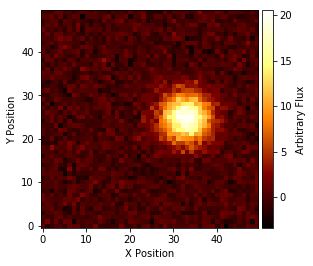

In [245]:
ax = plt.subplot(111)
im = ax.imshow(Source_Image,origin='lower',cmap='afmhot',)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plt.ylabel('Arbitrary Flux')


# Active Points

In [252]:
num_of_active_points = 500
num_of_model_sources = 1
ndim = 4
npix = 50
#Save objects
points = np.zeros((num_of_active_points,ndim))

#log_likelihood of live objects
log_like_of_live_points = np.zeros((num_of_active_points))


#Generate Live objects
for i in range(num_of_active_points):
    points[i,:] = Cube_points(u=np.random.uniform(0,1.0,size=ndim))
    model = Model_function(params=points[i,:],noise=Noise)
    log_like_of_live_points[i] = Log_Likelihood(data=Source_Image,sigma=Noise,model=model)
 


# Nest Intilialize

In [253]:
nest = 10000
keep = np.zeros((nest,ndim))  #store bad points
logl_sample = []     #Store Log-likelihood of samples
X_sample = []        #Store prior mass
   


logWT = []  #Store  weight =width*likelihood


logZ = -1e300     # SUM(weights)= Z Evidence
H = 0


mcmc_steps = 50

In [254]:
progressor = IntProgress(
    value=0,
    min=0,
    max=nest,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
) # instantiate the bar
display(progressor)
## MAIN NS LOOP##

#Outer interval 
logw = np.log(1.0 - np.exp(-1.0 / num_of_active_points))

start = time.time()
for i in range(nest):
    # Draw worst object with L* from n points
    worst = np.argmin(log_like_of_live_points)
    
    #Save worst opbject
    keep[i,:] = points[worst]
    logl_sample.append(log_like_of_live_points[worst])
    
    #Save prior mass
    X_sample.append(logw)
    
    #Weight
    logwt = logw + log_like_of_live_points[worst]
    
    
    #Save weight
    logWT.append(logwt)
    
    #Update Evidence Z
    logZnew = log_plus(logZ,logwt)   #np.logaddexp(logZ,logwt)     #CHANGED THIS LINE
    
    #Update H information
    H = np.exp(logwt-logZnew)*log_like_of_live_points[worst] \
    +np.exp(logZ-logZnew)*(H+logZ)-logZnew
    
    #Update logZ
    logZ = logZnew
    #Shrink interval
    logw -= 1.0/num_of_active_points
    

    while True:#----copy a random point and do mcmc from there-----
        copy = np.random.randint(len(points))
        if (copy != worst):break
            
    points[worst] = Makecopy.deepcopy(points[copy])
    log_Likelihood_old =  log_like_of_live_points[copy]
    
    theta = points[copy]
    
    #UNIT TEST check for correct shape
    assert theta.shape == (ndim,)
    
   # initialize mcmc params
    
    scale = 1.0
    accept = 0
    reject = 0
    for mcmci in range(mcmc_steps):  #Evolve within current worst likelihood L>L* , draw new point under constraint
    #while True:   
        propose_step = np.random.normal(0,scale=scale,size=ndim)
        new_point = theta + propose_step
        
        #Make all Amp == R_constant
        new_point_reshape = np.reshape(new_point,(int(len(new_point)/4),4))
        new_point_reshape[:,-2] = 4
        
        new_point = new_point_reshape.flatten()
        ##############################################################################
        #np.seterr(divide='ignore')

        #Calculate Log_likelihood of new point
        model = Model_function(params=new_point,noise=Noise)
        
        #Prior_current and Prior_old
        
        Prior_current = prior(new_point)
        Prior_old     = prior(theta)
        
        
        #Posterior_current and Posterior_old
        Log_Like_new = Log_Likelihood(data=Source_Image,sigma=Noise,model=model)
        
      
        Posterior_current = Log_Like_new + np.log(Prior_current)
        
        Posterior_old = log_Likelihood_old + np.log(Prior_old)
       
    ##################################################################################################
        #Acceptance ratio alpha
        alpha = np.exp(Posterior_current-Posterior_old)
        
        
        if alpha>=1:
            points[worst,:] = new_point  #Replace worst point with new point
            log_like_of_live_points[worst] = Log_Like_new   #Replace the worst likelihood with new one  
            accept += 1
            
            
        else:
            u = np.random.uniform()
            if u <= alpha :
                points[worst,:] = new_point 
                log_like_of_live_points[worst] = Log_Like_new
                accept += 1
                
                
            else:
                theta = theta
                reject +=1
                
        #Changing the scale
        if accept > reject:
            scale *= np.exp(1./accept)
        if accept < reject:
            scale /= np.exp(1./reject)

    
    #Acceptance_Ratio = accept/(accept+reject)
    #Acceptance[i] =  Acceptance_Ratio
    
    progressor.value += 1
    
                
    if i > nest*np.exp(H)/np.log(2.):
        #print("ok")
        
        break

end = time.time()
if progressor.value == progressor.max:
    progressor.description = "Done!"
    
Z = logZ
Z_err = np.sqrt((H)/num_of_active_points)
H =  H       #np.exp(H)/np.log(2.)
#print("Acceptance Ratio :",Acceptance_Ratio)
print('Evidence Z = {0} +-{1} : Information H = {2} '.format(Z,Z_err,H))
print('time:',end-start)

IntProgress(value=0, bar_style='success', description='Loading:', max=10000)

/home/hope-moloko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log


Evidence Z = -21.726606350586326 +-0.18414219622344288 : Information H = 16.95417421499647 
time: 441.95413732528687


In [255]:
wt = np.exp((logWT)-max(logWT))
Weights = wt/sum(wt)

#Effective sample size
effective_sample_size = int(np.exp(-np.sum(Weights*np.log(Weights+1e-300))))
S = 0
sample = np.zeros((effective_sample_size,ndim))


print('Effective Sample Size : {}'.format(effective_sample_size))

#Progress bar
progressor_samples = IntProgress(
    value=0,
    min=0,
    max=effective_sample_size,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
) # instantiate the bar
display(progressor_samples)

# Selecting the Effective sample
while True:
    rnd_point = np.random.randint(len(keep))
    #proba = prob_weighted[rnd_point]/max(prob_weighted)
    proba = Weights[rnd_point]/max(Weights)

    if np.random.rand() < proba:
        sample[S,:] = keep[rnd_point,:]
        
        S += 1
        progressor_samples.value += 1
    if S >= effective_sample_size:
        break


Effective Sample Size : 1926


IntProgress(value=0, bar_style='success', description='Loading:', max=1926)

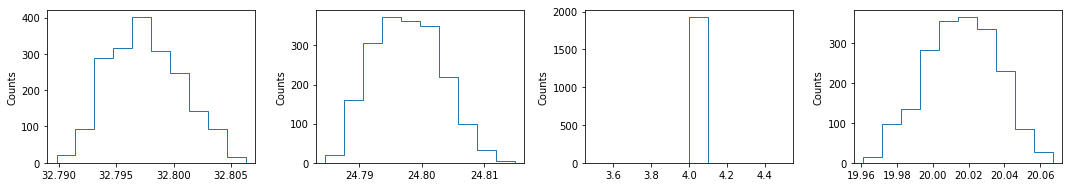

In [256]:
plt.figure(figsize=(15,10))

ndim = 4
#labels = ['x','y','a','x$_{1}$','y$_{1}$','a$_{1}$']
#truth =  [32.4,18.82,9.03,120.5,129.3,13.15]
for i in range(ndim):
    plt.subplot(4,4,i+1)
    plt.hist(sample[:,i],histtype="step")
    #plt.xlabel(labels[i])
    plt.ylabel('Counts')
    #plt.axvline(truth[i])

plt.tight_layout()